In [11]:
from vehicle import Vehicle
from scipy.optimize import fsolve as josie_solver
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

3.266600514913729e-31

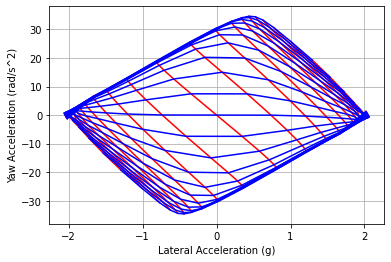

In [12]:
df = pd.read_csv("MMM_inc_fix.csv")

for x in df["body_slip"].unique():
    df2 = df[df["body_slip"] == x]
    plt.plot(df2["vehicle_accelerations_NTB_1"]/9.81, df2["yaw_acceleration"], 'r')
    #plt.text(list(df2["vehicle_accelerations_NTB_1"])[-1]/9.81, list(df2["yaw_acceleration"])[-1], f'sample {x}')

for x in df["steered_angle"].unique():
    df2 = df[(df["steered_angle"] == x)]
    plt.plot(df2["vehicle_accelerations_NTB_1"]/9.81, df2["yaw_acceleration"], 'b')
plt.grid()
plt.ylabel("Yaw Acceleration (rad/s^2)")
plt.xlabel("Lateral Acceleration (g)")

abs(df["yaw_acceleration"]).min()

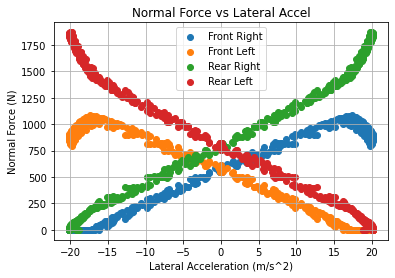

In [13]:
import math
plt.scatter(df["vehicle_accelerations_NTB_1"], df["front_left_tire_tire_centric_forces_2"], label = "Front Right")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["front_right_tire_tire_centric_forces_2"], label = "Front Left")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["rear_left_tire_tire_centric_forces_2"], label = "Rear Right")
plt.scatter(df["vehicle_accelerations_NTB_1"], df["rear_right_tire_tire_centric_forces_2"], label = "Rear Left")
plt.title("Normal Force vs Lateral Accel")
plt.grid()
plt.ylabel("Normal Force (N)")
plt.xlabel("Lateral Acceleration (m/s^2)")
plt.legend()

In [14]:
data_point = df.iloc[100]
for index, point in df.iterrows():
    if abs(point["yaw_acceleration"]) < 5 and abs(point["vehicle_accelerations_NTB_1"]) > abs(data_point["vehicle_accelerations_NTB_1"]):
       data_point = point
print(data_point)

Unnamed: 0                                9.000000
front_left_tire_unsprung_displacement    -0.006834
front_left_tire_tire_centric_forces_0     0.000000
front_left_tire_tire_centric_forces_1     0.000000
front_left_tire_tire_centric_forces_2     0.000000
                                           ...    
x_double_dot                             -6.577164
y_double_dot                            -19.092692
yaw_acceleration                          0.668031
roll                                     -0.050206
pitch                                    -0.016200
Name: 9, Length: 91, dtype: float64


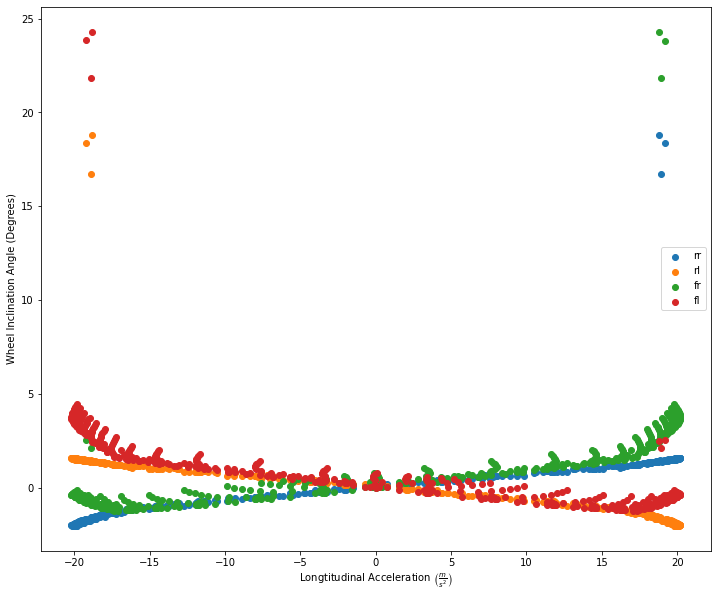

In [15]:
fig = plt.figure(figsize=(12,10))
plt.scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_inclination_angle'] * (180 / np.pi), label='rr')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_inclination_angle'] * (180 / np.pi), label='rl')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_inclination_angle'] * (180 / np.pi), label='fr')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_inclination_angle'] * (180 / np.pi), label='fl')
plt.legend()
plt.xlabel(r'Longtitudinal Acceleration $\left(\frac{m}{s^2}\right)$')
plt.ylabel('Wheel Inclination Angle (Degrees)')
plt.show()

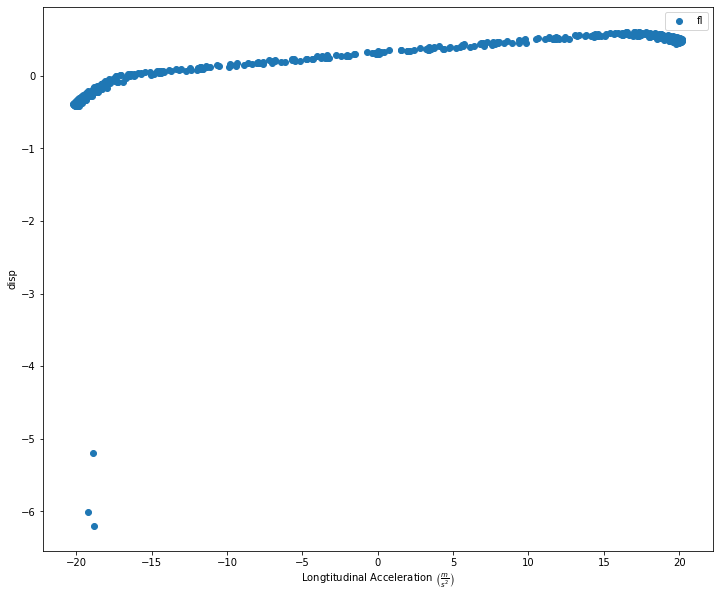

In [16]:
fig = plt.figure(figsize=(12,10))
#plt.scatter(df['vehicle_accelerations_NTB_1'], df['rear_right_tire_inclination_angle'] * (180 / np.pi), label='rr')
#plt.scatter(df['vehicle_accelerations_NTB_1'], df['rear_left_tire_inclination_angle'] * (180 / np.pi), label='rl')
#plt.scatter(df['vehicle_accelerations_NTB_1'], df['front_right_tire_inclination_angle'] * (180 / np.pi), label='fr')
plt.scatter(df['vehicle_accelerations_NTB_1'], df['front_left_tire_unsprung_displacement'] * (180 / np.pi), label='fl')
plt.legend()
plt.xlabel(r'Longtitudinal Acceleration $\left(\frac{m}{s^2}\right)$')
plt.ylabel('disp')
plt.show()

In [17]:
df.columns

Index(['Unnamed: 0', 'front_left_tire_unsprung_displacement',
       'front_left_tire_tire_centric_forces_0',
       'front_left_tire_tire_centric_forces_1',
       'front_left_tire_tire_centric_forces_2', 'front_left_tire_velocity_0',
       'front_left_tire_velocity_1', 'front_left_tire_velocity_2',
       'front_left_tire_slip_angle', 'front_left_tire_inclination_angle',
       'front_left_tire_vehicle_centric_forces_0',
       'front_left_tire_vehicle_centric_forces_1',
       'front_left_tire_vehicle_centric_forces_2', 'front_left_tire_moments_0',
       'front_left_tire_moments_1', 'front_left_tire_moments_2',
       'front_left_tire_steering_inclination', 'front_left_tire_z_c',
       'front_left_tire_f_roll', 'front_left_tire_f_heave',
       'front_right_tire_unsprung_displacement',
       'front_right_tire_tire_centric_forces_0',
       'front_right_tire_tire_centric_forces_1',
       'front_right_tire_tire_centric_forces_2', 'front_right_tire_velocity_0',
       'front_right

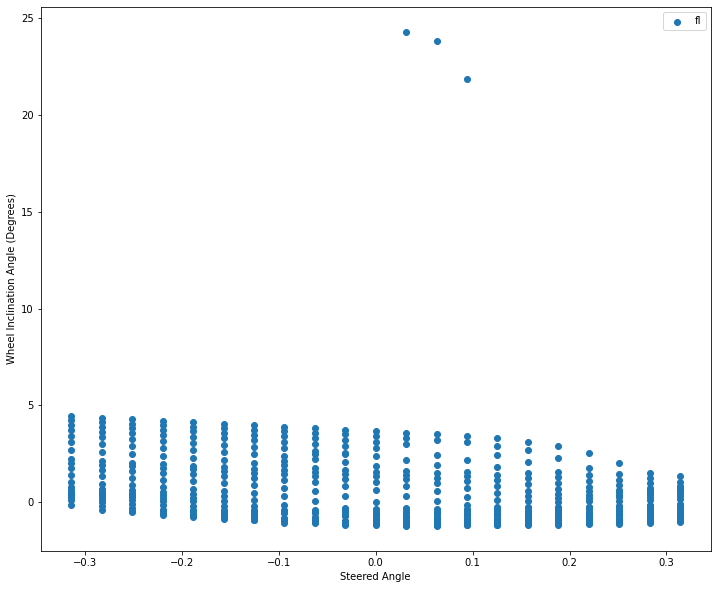

In [18]:
fig = plt.figure(figsize=(12,10))
#plt.scatter(df['steered_angle'], df['rear_right_tire_inclination_angle'] * (180 / np.pi), label='rr')
#plt.scatter(df['steered_angle'], df['rear_left_tire_inclination_angle'] * (180 / np.pi), label='rl')
#plt.scatter(df['steered_angle'], df['front_right_tire_inclination_angle'] * (180 / np.pi), label='fr')
plt.scatter(df['steered_angle'], df['front_left_tire_inclination_angle'] * (180 / np.pi), label='fl')
plt.legend()
plt.xlabel('Steered Angle')
plt.ylabel('Wheel Inclination Angle (Degrees)')
plt.show()

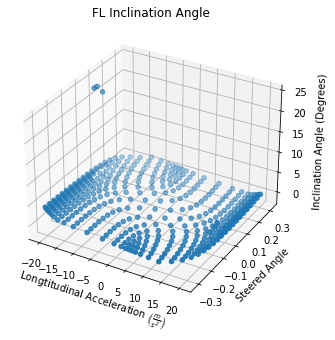

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig3 = plt.figure()
ax3 = Axes3D(fig3, auto_add_to_figure=False)
fig3.add_axes(ax3)

ax3.scatter(df['vehicle_accelerations_NTB_1'], df['steered_angle'], df['front_left_tire_inclination_angle'] * (180 / np.pi))
ax3.set(title='FL Inclination Angle', xlabel=r'Longtitudinal Acceleration $\left(\frac{m}{s^2}\right)$', ylabel='Steered Angle', zlabel='Inclination Angle (Degrees)')

plt.show()

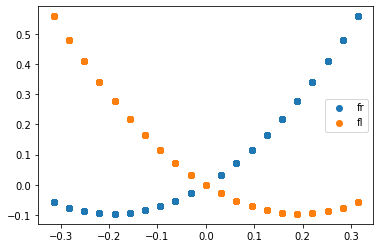

In [20]:
fig4 = plt.figure()
plt.scatter(df['steered_angle'], df['front_right_tire_steering_inclination'] * (180 / np.pi), label='fr')
plt.scatter(df['steered_angle'], df['front_left_tire_steering_inclination'] * (180 / np.pi), label='fl')
plt.legend()
plt.show()